# Numerische Methoden für Differentialgleichungen
## Aufgabenblatt 1
*gelöst von Stollmayer Max*

### Aufgabe 1
Das folgende System 2. Ordnung

\begin{cases}
    \ddot{y}_1 = t^2 - \dot{y}_1 - y_2^2 \\
    \ddot{y}_2 = t + \dot{y}_2 + y_1^3 \\
    y_1(0)=0, \dot{y}_1(0)=1, y_2(0)=1, \dot{y}_2(0)=0
\end{cases}

kann in ein System 1. Ordnung umgeschrieben werden:

\begin{cases}
    \dot{y}_1 = y_3 \\
    \dot{y}_2 = y_4 \\
    \dot{y}_3 = t^2 - y_3 - y_2^2 \\
    \dot{y}_4 = t + y_4 + y_1^3 \\
    y_1(0)=0, y_2(0)=1, y_3(0)=1, y_4(0)=0
\end{cases}

### Aufgabe 2

Implementierung des Vorwärts-Euler-Verfahrens für ODE Systeme 1. Ordnung.

#### Definition

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib import rcdefaults

rcdefaults()
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = [12.8, 7.2]
plt.rcParams["font.size"] = 12
plt.rcParams["axes.edgecolor"] = "white"
plt.rcParams["legend.frameon"] = True
plt.rcParams["legend.framealpha"] = 0.75
plt.rcParams["legend.facecolor"] = "white"
plt.rcParams["legend.edgecolor"] = "white"

In [2]:
def forward_euler(f, y0, t0, tN, N):
    '''
    Returns list of input values and list of corresponding function values approximated with the forward Euler method.

    f .... function of ODE y' = f(y, t)
    y0 ... initial value y(t0) = y0
    t0 ... starting point of interval
    tN ... end point of interval
    N .... number of steps
    '''

    h = (tN - t0) / N
    t = t0 + h * np.arange(N+1)

    if type(y0) == int:
        y = np.zeros(N+1)
    else:
        y = np.zeros((N+1, np.size(y0)))
    y[0] = y0

    for n in range(0, N):
        y[n+1] = y[n] + h * f(y[n], t[n])

    return t, y

#### Test 1
$y'(t) = y(t)$

In [3]:
def f1(y, t):
    return y

y0_1 = 1
t0_1 = 1
tN_1 = 4
N1 = 10

t1, y1 = forward_euler(f1, y0_1, t0_1, tN_1, N1)

for v in zip(t1, y1):
    print(f"y({v[0]:.1f}) = {v[1]:5.2f}")

y(1.0) =  1.00
y(1.3) =  1.30
y(1.6) =  1.69
y(1.9) =  2.20
y(2.2) =  2.86
y(2.5) =  3.71
y(2.8) =  4.83
y(3.1) =  6.27
y(3.4) =  8.16
y(3.7) = 10.60
y(4.0) = 13.79


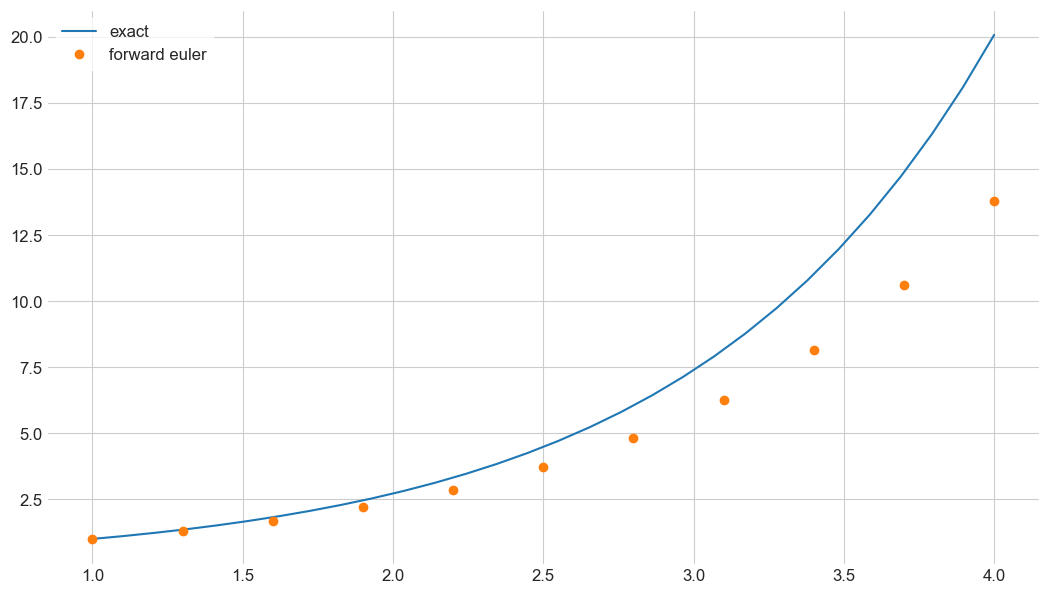

In [4]:
x = np.linspace(1, 4, 30)

plt.plot(x, np.exp(x - 1), label="exact")
plt.plot(t1, y1, "o", label="forward euler")
plt.legend()
plt.show()

#### Test 2
Lotka-Volterra equations

In [5]:
def g(y, t, a, b, c, d):
    return np.array([-(a - b * y[1]) * y[0], (c - d * y[0]) * y[1]])

def f2(y, t):
    return g(y, t, 1, 0.1, 4, 1)

y0_2 = np.array([3, 5])
t0_2 = 0
tN_2 = 10
N2 = 1000

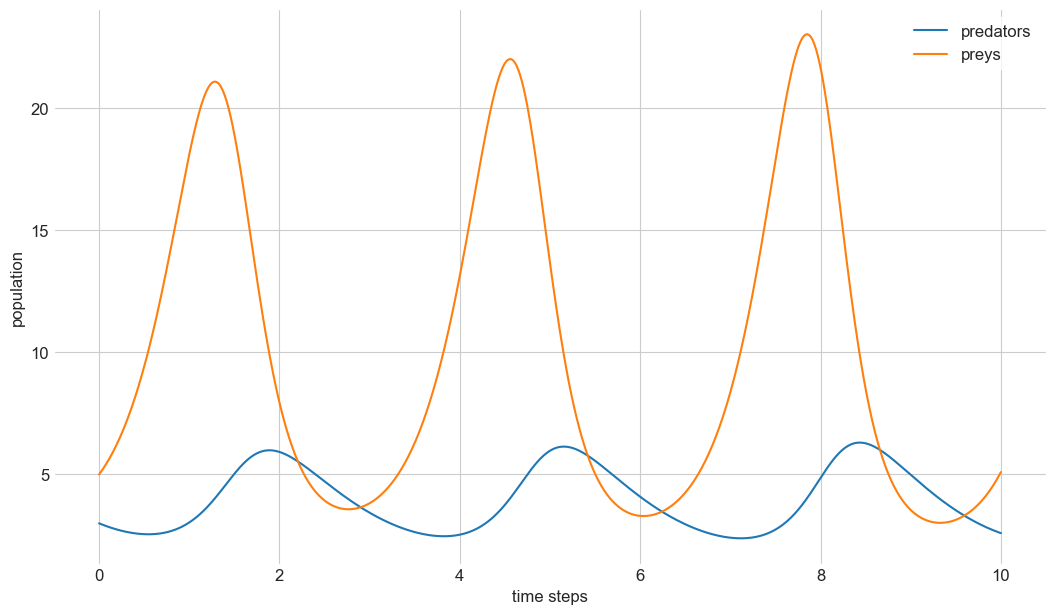

In [6]:
t2, y2 = forward_euler(f2, y0_2, t0_2, tN_2, N2)

plt.plot(t2, y2[:, 0], label="predators")
plt.plot(t2, y2[:, 1], label="preys")
plt.xlabel("time steps")
plt.ylabel("population")
plt.legend()
plt.show()